In [1]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/Users/superchamp/Downloads/adult.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# describing the dataset
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


No missing values in the dataset and it contains a mix of categorical and numerical variables

/var/folders/zy/0xq3k9gn6nz3_wb1rzqf0_w40000gp/T/ipykernel_71319/2958715492.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  census_corr = df.corr()


<Axes: >

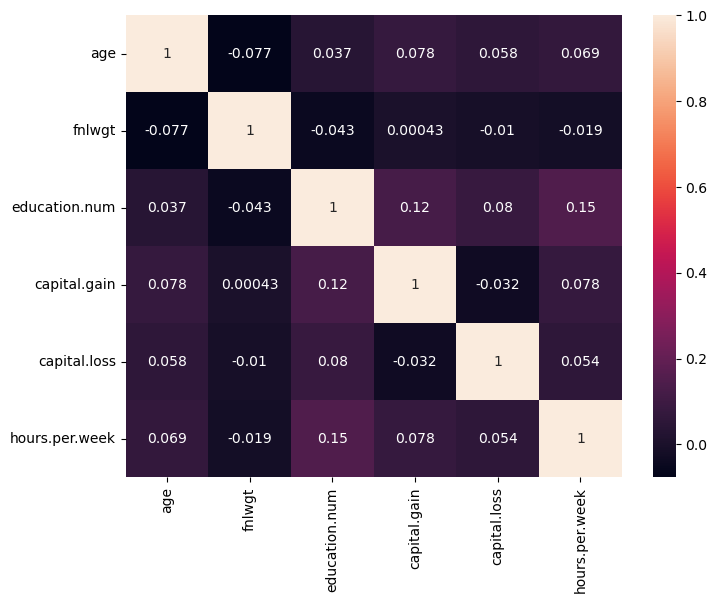

In [6]:
#checking correlation
plt.figure(figsize=(8,6))
census_corr = df.corr()
sns.heatmap(census_corr, annot=True)

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Train a Multinomial Naive Bayes Classifier on the entire data set but with the predictors restricted to the categorical ones. Output 4 significantly predictive features learned by the model. Report these features in your report, together with evidence that they are significantly predictive. The word "feature" means a particular categorical variable taking on a particular value, e.g. education = HS-Grad. You may need to preprocess the data suitably. For instance, to encode categories in the various categorical predictors to integers. Figure out how to quantify how predictive a feature is of the class. So long as your procedure makes sense and the features you report are indeed significantly predictive of the class, you will get full credit.

In [9]:
#Defining categorical variables
categorical_columns = ['workclass','education','marital.status','occupation',
                       'relationship','race','sex','native.country']

In [10]:
df_categorical = df[categorical_columns]

In [11]:
# Applying Label Encoding or One-Hot Encoding to convert categorical data to numerical
dict_vectorizer = DictVectorizer(sparse=False)
X_cat = dict_vectorizer.fit_transform(df_categorical.to_dict(orient='records'))

In [12]:
y = df['income']

In [13]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=42)

In [14]:
# Training the Multinomial Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [15]:
# Predicting using the trained model
predictions = nb_classifier.predict(X_test)

In [16]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [17]:
from sklearn.metrics import f1_score

f1_score(y_test, nb_classifier.predict(X_test), labels = ['<=50K', '>50K'], average=None)

array([0.85672052, 0.61828411])

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test,
                            nb_classifier.predict(X_test),
                            labels = ['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.90      0.82      0.86      4976
        >50K       0.54      0.72      0.62      1537

    accuracy                           0.79      6513
   macro avg       0.72      0.77      0.74      6513
weighted avg       0.82      0.79      0.80      6513



# Getting significantly predictive features learned by the model.

In [19]:
feature_names = dict_vectorizer.get_feature_names_out()
feature_probabilities = nb_classifier.feature_log_prob_[1]  # Assuming '>50K' is the positive class
top_features_indices = feature_probabilities.argsort()[-4:][::-1]
top_features = [feature_names[i] for i in top_features_indices]
feature_predictiveness = [feature_probabilities[i] for i in top_features_indices]

# Print the results
print("Top 4 Predictive Features:")
for i in range(4):
    print(f"{top_features[i]} (Predictiveness: {feature_predictiveness[i]})")

# Evaluate accuracy on the test set
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on the Test Set: {accuracy}")

Top 4 Predictive Features:
native.country=United-States (Predictiveness: -2.1704943624320006)
race=White (Predictiveness: -2.177454543653557)
marital.status=Married-civ-spouse (Predictiveness: -2.239400537486457)
sex=Male (Predictiveness: -2.243682401982566)

Accuracy on the Test Set: 0.7916474742822048


# Train a Gaussian Naive Bayes Classifier on the entire data set with the predictors restricted to be the numeric ones. Output the 3 most predictive features learned by the model. The features in this case are the numeric predictor variables. Figure out how to quantify how predictive each numeric predictor is of the class based on certain "things" that the Gaussian NBC has learned. Your approach does not need to be super-accurate, only good enough to distinguish between features that are highly predictive from those that are not. Concisely explain your procedure in the report. 

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
#defining numerical variables
numerical_columns = ['age','fnlwgt','education.num','capital.loss','hours.per.week']
df_numeric = df[numerical_columns]

In [22]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

In [23]:
gnb.fit(df_numeric, df['income'])

GaussianNB()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_numeric, df['income'], test_size=0.2, random_state=42)

In [25]:
predictions = gnb.predict(X_test)

In [26]:
from sklearn.metrics import f1_score

f1_score(y_test, gnb.predict(X_test), labels = ['<=50K', '>50K'], average=None)

array([0.86293781, 0.16357688])

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,
                            gnb.predict(X_test),
                            labels = ['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.78      0.97      0.86      4976
        >50K       0.51      0.10      0.16      1537

    accuracy                           0.76      6513
   macro avg       0.64      0.53      0.51      6513
weighted avg       0.71      0.76      0.70      6513



In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


selector = SelectKBest(f_classif, k=3)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)


selected_feature_indices = selector.get_support(indices=True)


X_train_selected = X_train_scaled[:, selected_feature_indices]
X_test_selected = X_test_scaled[:, selected_feature_indices]


nb_classifier = GaussianNB()
nb_classifier.fit(X_train_selected, y_train)


top_features = df_numeric.columns[selected_feature_indices]


print("Top 3 Predictive Features:")
for feature in top_features:
    print(feature)


y_pred = nb_classifier.predict(X_test_selected)
accuracy = (y_pred == y_test).mean()
print(f"\nAccuracy on the Test Set: {accuracy}")


Top 3 Predictive Features:
age
education.num
hours.per.week

Accuracy on the Test Set: 0.8008598188238907


# Train a Decision Tree classifier on the full data set. Print the learned tree.  Write a paragraph describing the main insights that one can glean from the learned tree. Use appropriate parameters (if needed) during the training process (call to fit) to ensure that the tree that gets produced is not excessively large. (This may also help with training time.) Concisely explain and report these parameter settings in your report.  The tree may be printed as text or graphics.

In [29]:
# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [30]:
X = df.drop('income', axis=1)
y = df['income']

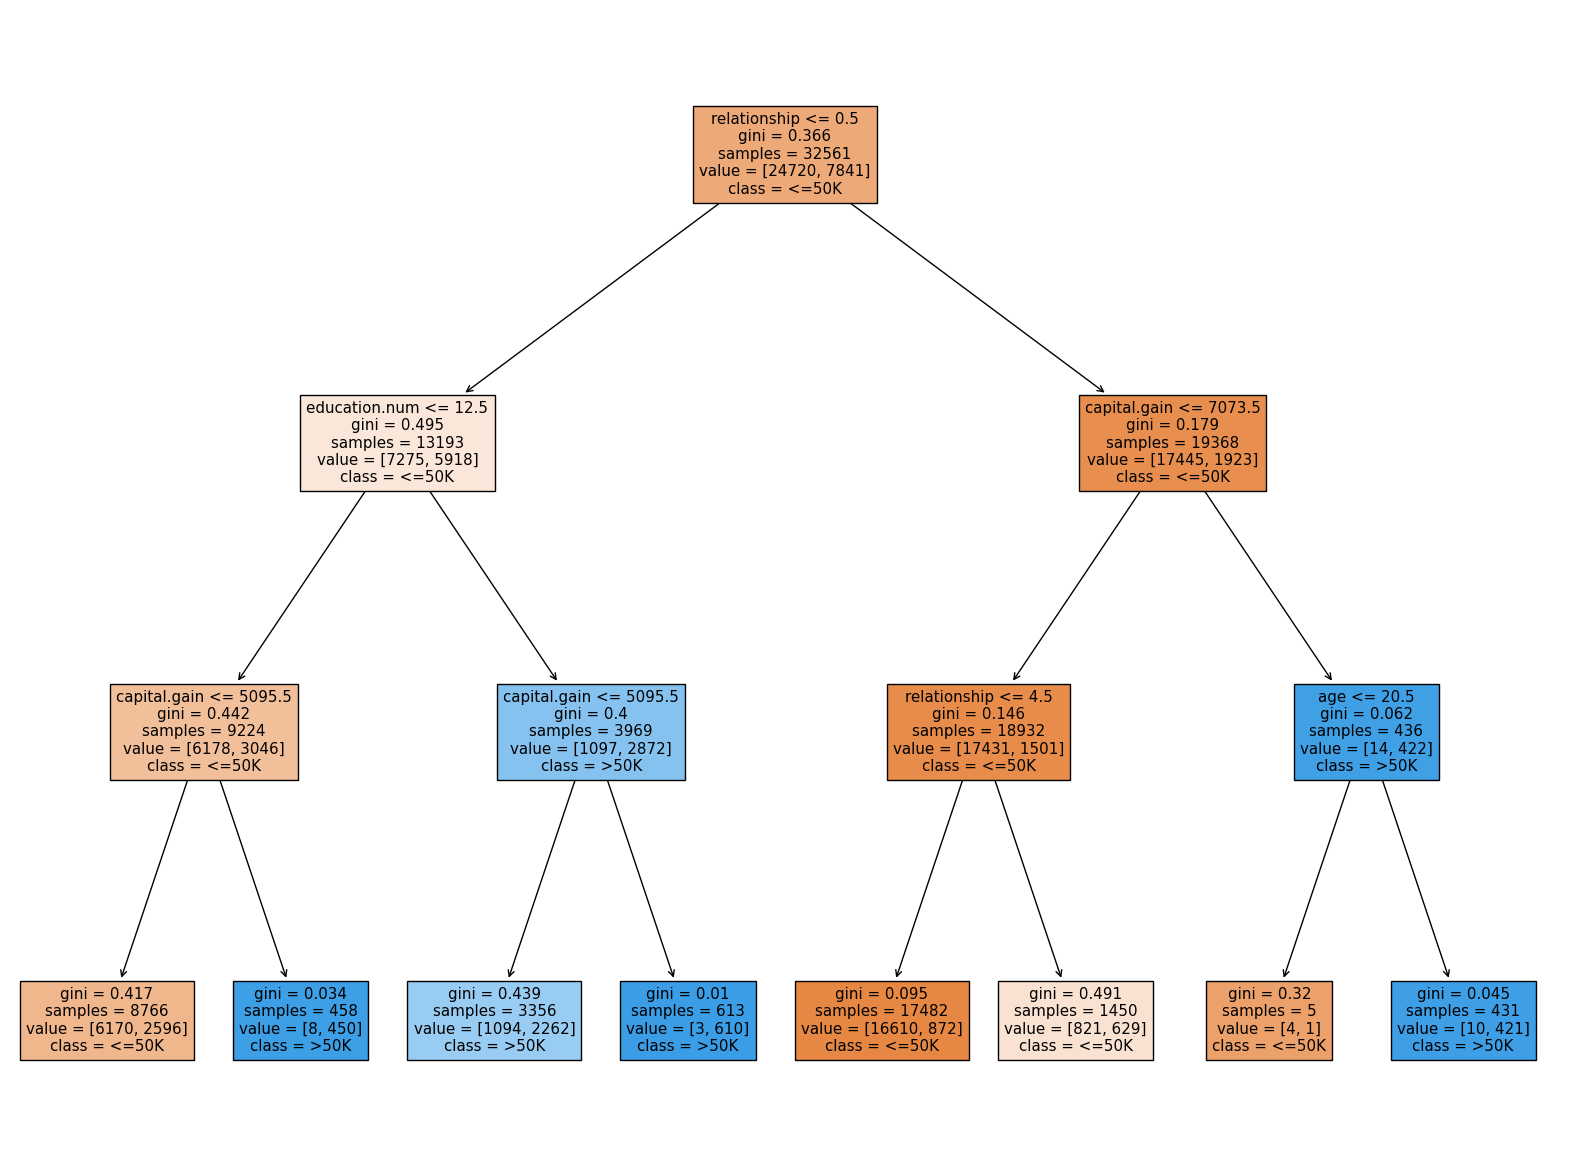

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


clf = DecisionTreeClassifier(max_depth=3) 
clf.fit(X, y)

# Plot and display the learned tree
plt.figure(figsize=(20, 15))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoders['income'].classes_)
plt.show()

# Do a single random train-test split (50:50) of the data. Train both a Naive Bayes Classifier and a Decision Tree classifier on TRAIN. In your report, explain and describe any settings for hyperparameters you used during the various trainings. You can skip this if you used defaults in the calls to fit. Compute the ROC curves of the two classifiers on TEST, interpreting ">50K" as the positive class. Include plots of the ROC curves in your report,  together with a brief explanation of what they reveal.

In [32]:
X = df.drop('income', axis=1)
y = df['income']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_predictors = X.select_dtypes(include=['int64', 'float64'])
categorical_predictors = X.select_dtypes(include=['object'])

numeric_features = numeric_predictors.columns
numeric_transformer = MinMaxScaler()


categorical_features = categorical_predictors.columns
categorical_transformer = OneHotEncoder(drop='first')

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


nb_multinomial = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])
nb_multinomial.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index([], dtype='object'))])),
                ('classifier', MultinomialNB())])

In [35]:
numeric_transformer.fit(X_train[numeric_features])
X_train_numeric = numeric_transformer.transform(X_train[numeric_features])
nb_gaussian = GaussianNB()
nb_gaussian.fit(X_train_numeric, y_train)


X_test_numeric = numeric_transformer.transform(X_test[numeric_features])
nb_y_pred = nb_multinomial.predict_proba(X_test)[:, 1] * nb_gaussian.predict_proba(X_test_numeric)[:, 1]

In [36]:
decision_tree_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42))])
decision_tree_classifier.fit(X_train, y_train)

y_pred_dt = decision_tree_classifier.predict_proba(X_test)[:, 1]

fpr_nb_multinomial, tpr_nb_multinomial, _ = roc_curve(y_test, nb_multinomial.predict_proba(X_test)[:, 1])
fpr_nb_gaussian, tpr_nb_gaussian, _ = roc_curve(y_test, nb_gaussian.predict_proba(X_test_numeric)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)

auc_nb_multinomial = auc(fpr_nb_multinomial, tpr_nb_multinomial)
auc_nb_gaussian = auc(fpr_nb_gaussian, tpr_nb_gaussian)
auc_dt = auc(fpr_dt, tpr_dt)

Multinomial Naive Bayes AUC: 0.79
Gaussian Naive Bayes AUC: 0.85
Decision Tree AUC: 0.88


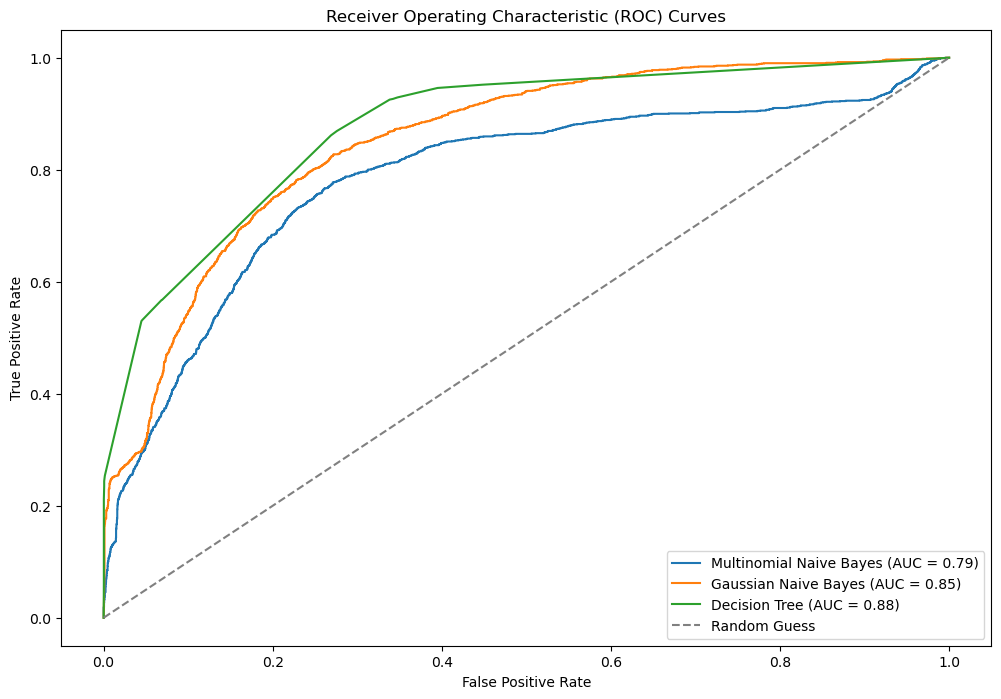

In [37]:
print(f'Multinomial Naive Bayes AUC: {auc_nb_multinomial:.2f}')
print(f'Gaussian Naive Bayes AUC: {auc_nb_gaussian:.2f}')
print(f'Decision Tree AUC: {auc_dt:.2f}')


plt.figure(figsize=(12, 8))
plt.plot(fpr_nb_multinomial, tpr_nb_multinomial, label=f'Multinomial Naive Bayes (AUC = {auc_nb_multinomial:.2f})')
plt.plot(fpr_nb_gaussian, tpr_nb_gaussian, label=f'Gaussian Naive Bayes (AUC = {auc_nb_gaussian:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()